In [16]:
# import necessary python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [17]:
# load raw data to pands data frame
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [18]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


### Summary statistics and Missing values report

- The data contains numerical and categorical(cleaning) data points
- The comment column must be dropped since most of it is NaN
- GHI, DNI & DHI contains negative value, which is not valid. since irradiation can't be negative
- From the quartile I can observe some columns are skewed

In [19]:
# identify a column with a lot of NaN values
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Outlier detection and Basic cleaning

- drop comments column
- set negative values in GHI, DNI and DHI to 0.
- check the presence of outliers using boxplot 
- remove outlier rows using z-score value

In [20]:
df = df.drop('Comments', axis=1)
neg_val_cols = ['GHI', 'DNI', 'DHI'] # set all negative values of these cols to 0.
df[neg_val_cols] = df[neg_val_cols].clip(lower=0)
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,204.406778,116.523731,116.273677,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,296.787520,218.573992,157.020868,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.300000,0.000000,0.000000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


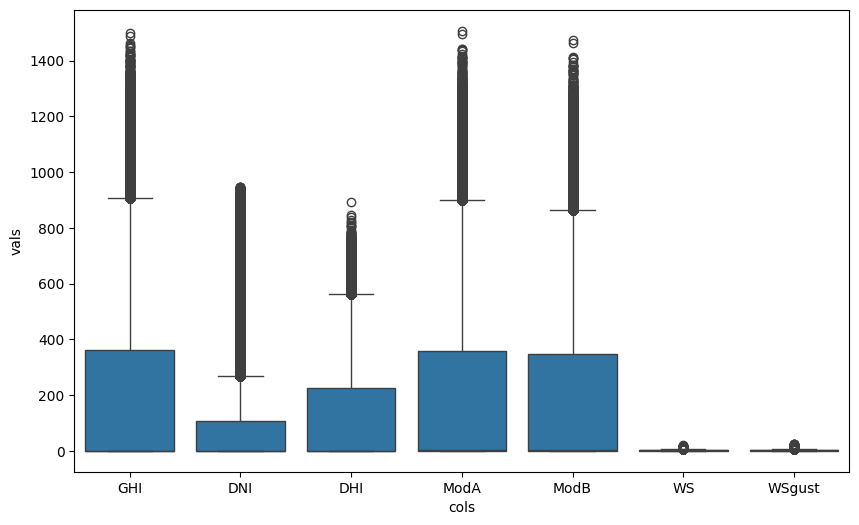

In [21]:
# columns with potential outlier values
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_melted = pd.melt(df[outlier_cols], var_name='cols', value_name='vals')
plt.figure(figsize=(10, 6))
sns.boxplot(x='cols', y='vals', data=df_melted)
plt.show()


In [22]:
# flag rows that has any value of |z-score| > 3
df_zscore = df[outlier_cols].apply(zscore)
mask = (df_zscore.abs() > 3).any(axis=1)
df_cleaned = df[~mask]
df_cleaned.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000,509053.000000
mean,187.214752,104.210233,110.503601,189.482010,181.418592,26.212834,79.750000,1.089577,1.613962,0.352209,130.909908,6.959702,999.872797,0.000998,0.004161,31.951112,32.078820
std,277.016414,200.824799,151.444586,281.653109,269.751580,4.397670,20.559908,1.155184,1.503339,0.283723,114.362274,7.454577,2.106968,0.031574,0.040215,12.025518,11.663113
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.400000,23.700000
50%,0.000000,0.000000,0.000000,1.200000,1.100000,25.100000,86.100000,0.800000,1.400000,0.400000,156.100000,5.800000,1000.000000,0.000000,0.000000,26.300000,26.500000
75%,330.500000,74.400000,217.600000,326.500000,313.900000,29.200000,97.000000,1.900000,2.600000,0.500000,232.800000,11.800000,1001.000000,0.000000,0.000000,39.500000,40.000000
max,1094.000000,772.200000,587.300000,1105.000000,1064.000000,39.900000,100.000000,4.800000,6.400000,2.500000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.200000,70.000000


 ### After removing the outliers data size dropped by 3.15%

In [23]:
# save the cleaned data in csv format
df_cleaned.to_csv('../data/sierraleone-clean.csv')